# Dog Breed Prediction Using Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# End-to-End Multiclass(as 120 breeds of dog exist if there where only two breeds it would have been binary classification) Image classifier using TensorFlow

# Problem - Identifying the breed of a dog

# Data - Obtained from Kaggle(Dog breed identification)

# Evaluate - The evaluation is a file with prediction probabilities of each breed of each image how much chance is there that the dog belongs to this category

# Features -
  - We are dealing with images that are unstructured data so we will implement deep learning/transfer learning
  - There are 120 breeds of dogs (120 different classes so not 2 classes so not binary classification)
  - The train folder has 10000+ images with label
  - The test folder has 10000+ images without label so that we can predict them
  


In [ ]:
# importing data
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print("TensorFlow version : "+ tf.__version__)
print("TensorFlow Hub Version = "+hub.__version__)
print("GPU","Availabe" if tf.config.list_physical_devices("GPU") else "Sorry From Google")

TensorFlow version : 2.11.0
TensorFlow Hub Version = 0.12.0
GPU Availabe


In [ ]:

tf.config.list_physical_devices()



[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# TensorFlow is Ready
# GPU Has been added

# getting our data ready by turning them into tensors i.e. turning them into numerical matrix

In [ ]:
import pandas as pd
label=pd.read_csv("/content/drive/MyDrive/Neural Networks/labels.csv")
label["breed"].value_counts().median()

82.0

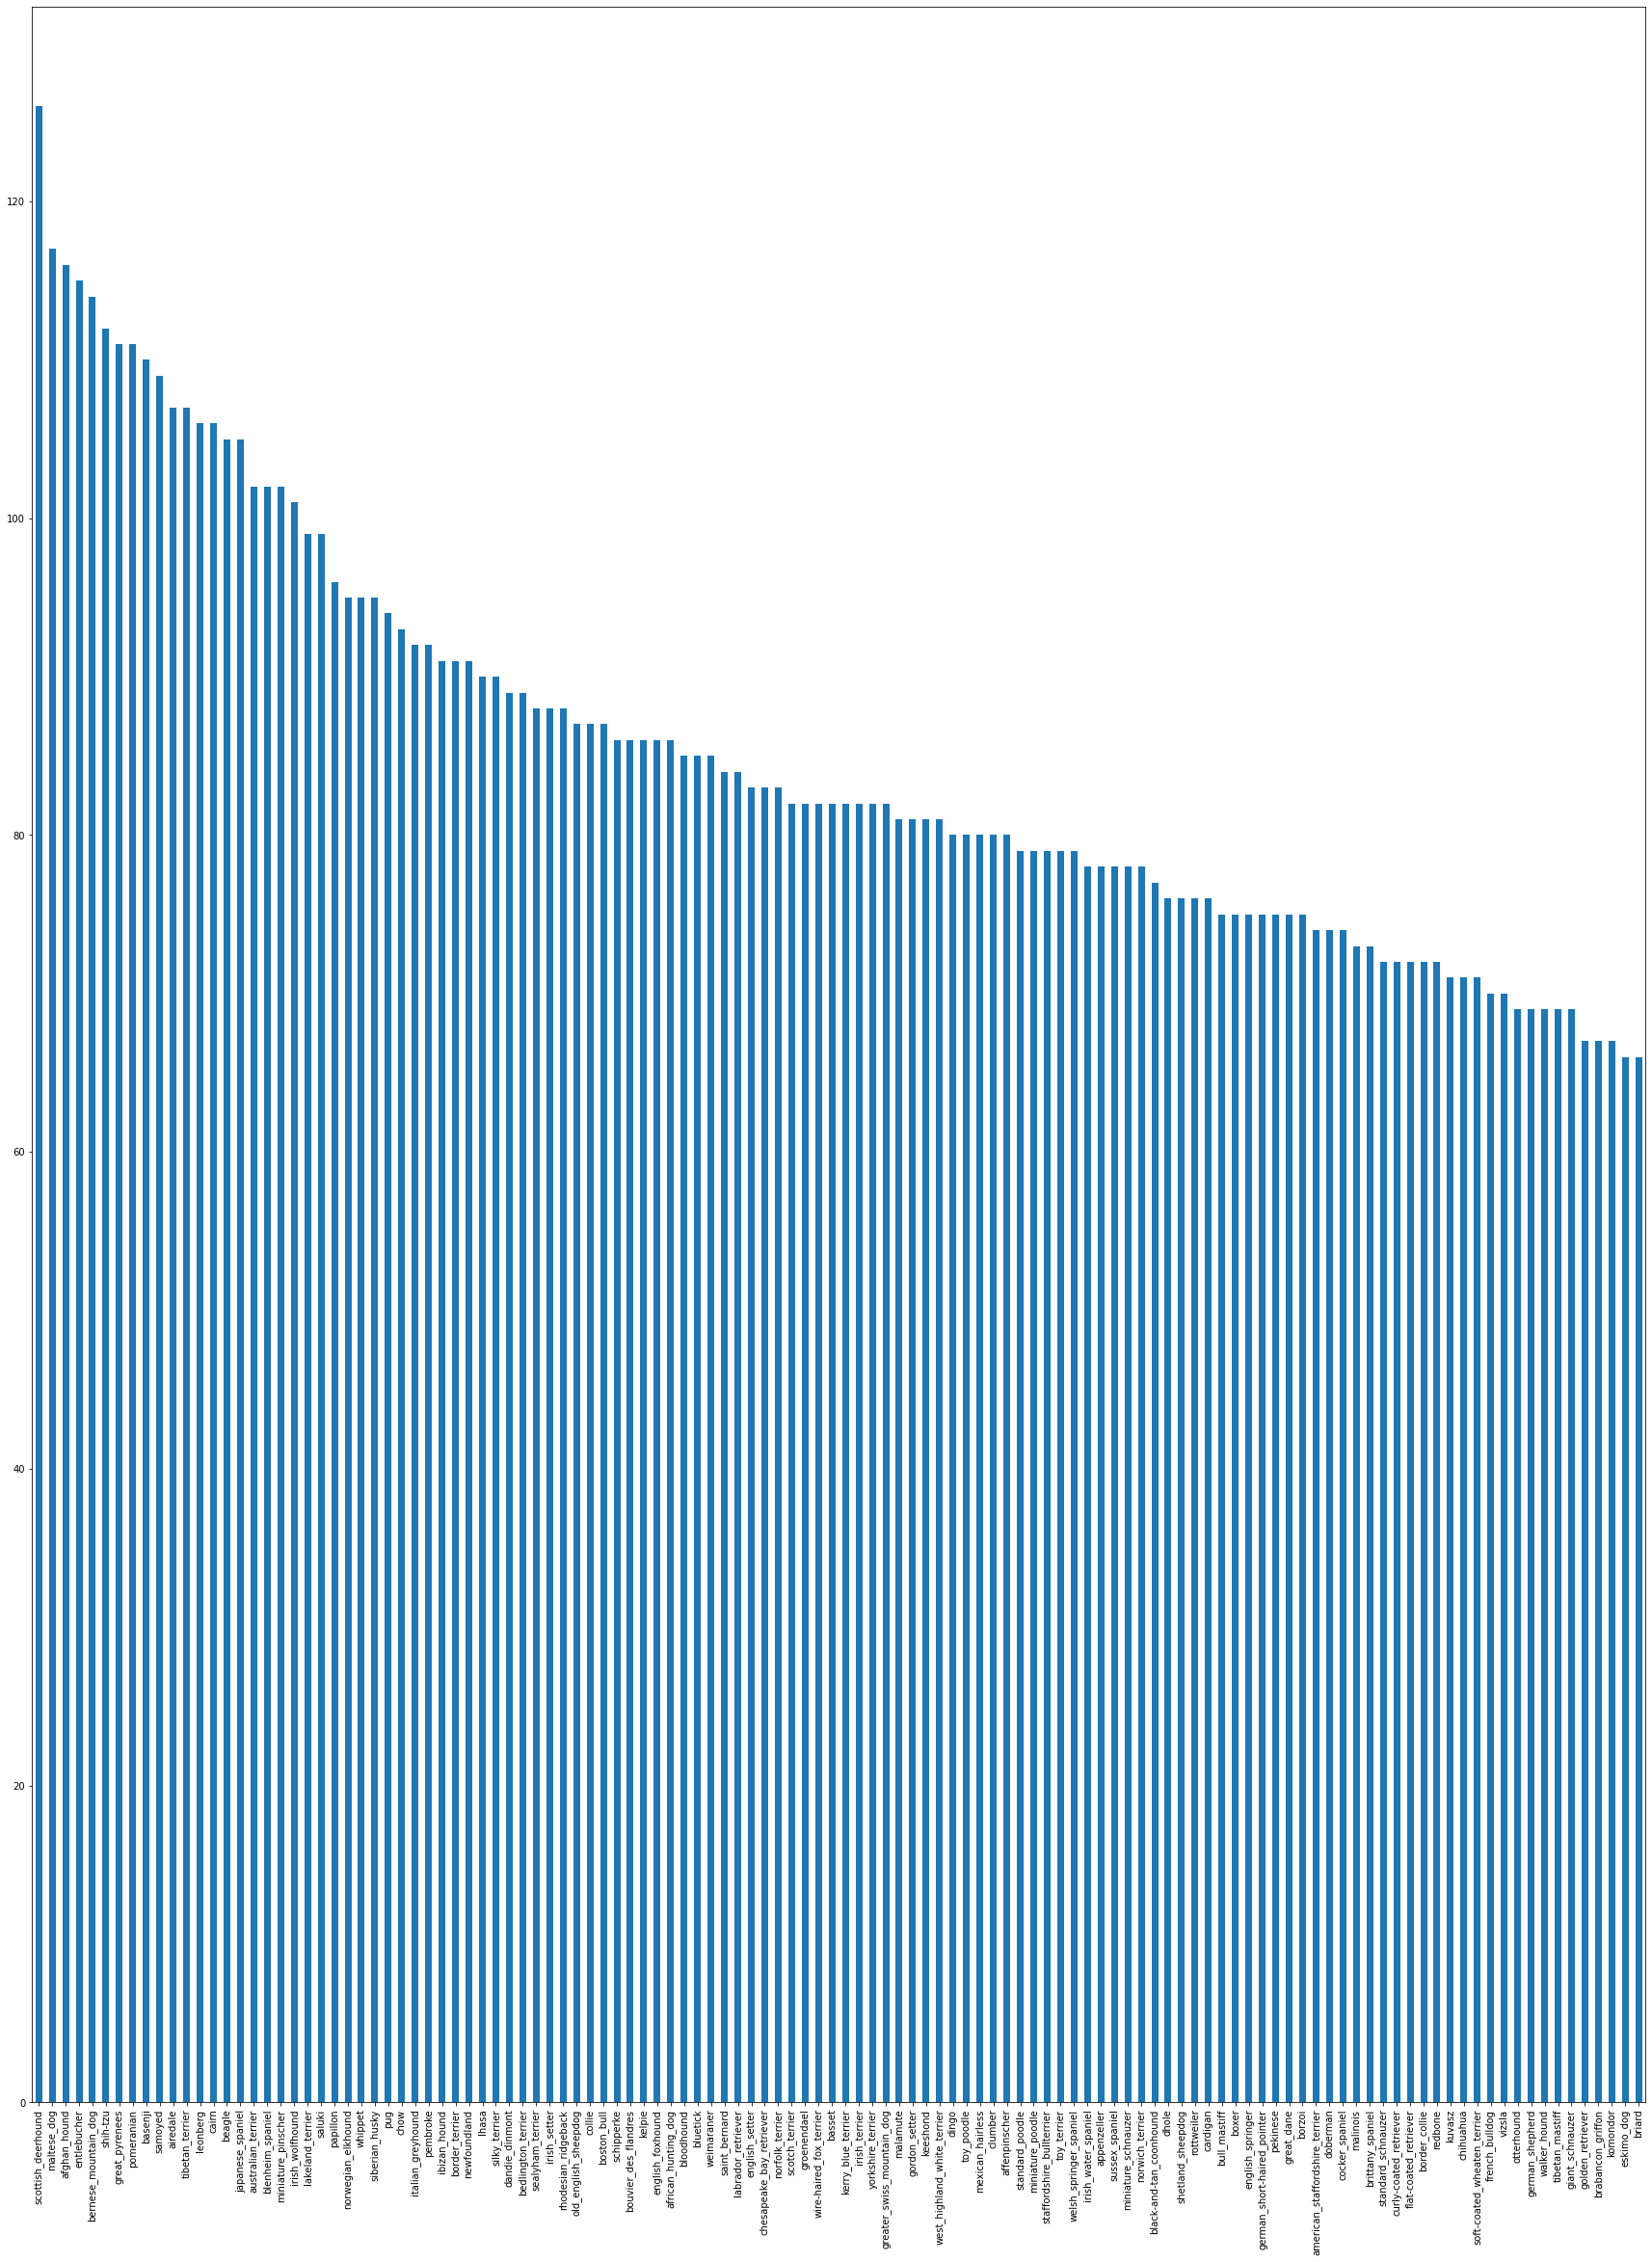

In [ ]:
label["breed"].value_counts().plot.bar(figsize=(30,40))

## Getting our Data Ready into Numerical Format

#### for this we will turn our Images into tensors

# Let's use Cells to view Image

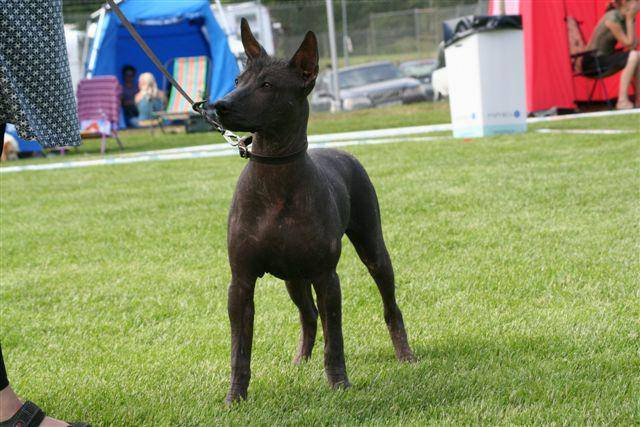

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/Neural Networks/train/0a65ba3ab9b29c66e15cec76f34eca6f.jpg")

In [ ]:
# Getting the address of each image

Train_Path="/content/drive/MyDrive/Neural Networks/train/"

id_name=[ Train_Path+forname+".jpg" for forname in label["id"] ]


In [ ]:
id_name[:10]

['/content/drive/MyDrive/Neural Networks/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Neural Networks/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Neural Networks/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Neural Networks/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Neural Networks/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Neural Networks/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Neural Networks/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Neural Networks/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Neural Networks/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Neural Networks/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
len(id_name)

10222

In [ ]:
import os

if len(os.listdir(Train_Path))==len(id_name):
  print("Proceed ahead no problem with the data fetch")
else:
  print("!!! There is some problem in the files below")

!!! There is some problem in the files below


In [ ]:
len(os.listdir(Train_Path))

10250

# -> Images that have a ID issue are missing so proceed furthur or related to some other files

In [ ]:
import numpy as np
labels = label["breed"].to_numpy()
# labels=np.array(labels) // does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

# Since earlier the other files where interfearing we ignored now we are checking that for each id there is an breed available

In [ ]:
if len(labels)==len(id_name):
  print("For each id there is a label so proceed")
else:
  print("For each id there does'nt exist a label sorry :(")

For each id there is a label so proceed


## Change the Labels from String to Numb er as a Machine learning Algorithm cannot work on String it needs numbers

In [ ]:
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [ ]:
print(labels[1200])
labels[0]==unique_breeds # From these true false values we can get neumeric data

afghan_hound


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels= [ unique_breeds == lab for lab in labels ]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
x=id_name
y=boolean_labels

In [ ]:
print(labels[0])
print(np.where(boolean_labels[0]==unique_breeds))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
# set the number of images used in testing our model
NUM_IMAGE=1000 #@param {type:"slider",min:1000,max:10000,step:100}

In [ ]:
# now split data into two different set train and validation
from sklearn.model_selection import train_test_split # basic principal is to split data

# spliting data of size NUM_IMAGE
X_train,X_valid,Y_train,Y_valid=train_test_split(x[:NUM_IMAGE],y[:NUM_IMAGE],test_size=0.2,random_state=77)

len(X_train),len(X_valid),len(Y_train),len(Y_valid)

(800, 200, 800, 200)

# Preprocessing Images i.e Converting Images into Tensors(numerical matrix)

### We will  create a function that will do the following task:-
* Takes an Image in the File System as an input.
* Use Tensor Flow to read the address and store the image in a variable let's say `image`
* Turn our jpg `image` to Tensors
* Normalize the value 0-255 -> 0-1
* Resize the image to size (224,224)
* Return the modified `image`

In [ ]:
from matplotlib.pyplot import imread
image=imread(id_name[43])
image

array([[[178, 165, 131],
        [179, 166, 132],
        [182, 167, 134],
        ...,
        [ 59,  45,  36],
        [ 53,  39,  30],
        [ 38,  30,  19]],

       [[176, 163, 129],
        [178, 165, 131],
        [180, 165, 132],
        ...,
        [ 61,  47,  38],
        [ 55,  41,  32],
        [ 40,  32,  21]],

       [[175, 162, 128],
        [176, 163, 129],
        [179, 164, 131],
        ...,
        [ 63,  49,  40],
        [ 56,  42,  33],
        [ 43,  35,  24]],

       ...,

       [[117, 112,  93],
        [124, 119, 100],
        [136, 129, 111],
        ...,
        [128, 100,  78],
        [145, 121,  97],
        [165, 138, 127]],

       [[125, 120, 101],
        [128, 123, 104],
        [136, 129, 111],
        ...,
        [142, 114,  92],
        [156, 132, 108],
        [170, 143, 132]],

       [[134, 129, 110],
        [135, 130, 111],
        [139, 132, 114],
        ...,
        [149, 121,  99],
        [160, 136, 112],
        [165, 138, 127]]

In [ ]:
image.min(),image.max(),image.shape ## the third para of shape in RGB that is  and other 2 are length and breath

(0, 255, (500, 401, 3))

In [ ]:
# turning Image into Tensor
tf.constant(image)

<tf.Tensor: shape=(500, 401, 3), dtype=uint8, numpy=
array([[[178, 165, 131],
        [179, 166, 132],
        [182, 167, 134],
        ...,
        [ 59,  45,  36],
        [ 53,  39,  30],
        [ 38,  30,  19]],

       [[176, 163, 129],
        [178, 165, 131],
        [180, 165, 132],
        ...,
        [ 61,  47,  38],
        [ 55,  41,  32],
        [ 40,  32,  21]],

       [[175, 162, 128],
        [176, 163, 129],
        [179, 164, 131],
        ...,
        [ 63,  49,  40],
        [ 56,  42,  33],
        [ 43,  35,  24]],

       ...,

       [[117, 112,  93],
        [124, 119, 100],
        [136, 129, 111],
        ...,
        [128, 100,  78],
        [145, 121,  97],
        [165, 138, 127]],

       [[125, 120, 101],
        [128, 123, 104],
        [136, 129, 111],
        ...,
        [142, 114,  92],
        [156, 132, 108],
        [170, 143, 132]],

       [[134, 129, 110],
        [135, 130, 111],
        [139, 132, 114],
        ...,
        [149, 121,  9

In [ ]:
# writting the Function

#Image size
IMG_SIZE=224

def processImage(imagePath):
  """
    Take the Image addres in the file system and turns them into Tensors of valid size and returns them
  """

  # reading our Image
  image=tf.io.read_file(imagePath)

  # turning our image into numerical tensor with 3 color channel(RGB)
  image=tf.image.decode_jpeg(image,channels=3)

  # Normalize the Image range to make Computing efficient array value 0-255 -> 0-1
  image=tf.image.convert_image_dtype(image,tf.float32)

  # resizing the image
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

# Turning our data to batch as there might not be enough memory for 10000 images in the RAM

In [ ]:
# Simple function to process the image and label and return a tuple

def get_image_label(image,label):
    """
    The function process the image address and sends the
    image along with label all in tensors
    """
    image=processImage(image)
    return image,label

In [ ]:
get_image_label(id_name[10],labels[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41753423, 0.38224012, 0.40184796],
         [0.4316044 , 0.39631027, 0.4159181 ],
         [0.40602714, 0.37879497, 0.3957155 ],
         ...,
         [0.19028023, 0.17067239, 0.18635866],
         [0.28062278, 0.26101494, 0.2767012 ],
         [0.28965282, 0.27004498, 0.28573126]],
 
        [[0.36733648, 0.33204237, 0.3516502 ],
         [0.3150591 , 0.27976498, 0.29937282],
         [0.29561085, 0.26837867, 0.2852992 ],
         ...,
         [0.23583163, 0.21230222, 0.22014536],
         [0.2812507 , 0.25772128, 0.2655644 ],
         [0.26320195, 0.23967254, 0.24751568]],
 
        [[0.40703085, 0.3717367 , 0.3907143 ],
         [0.46396694, 0.42867282, 0.4476504 ],
         [0.5020599 , 0.47482777, 0.491118  ],
         ...,
         [0.27574417, 0.24076518, 0.24374136],
         [0.30945447, 0.27447549, 0.27745166],
         [0.25501153, 0.22003253, 0.22300872]],
 
        ...,
 
        [[0.26359692, 0.28712633

### we are know function to take our Image file address and label tuple and turn that into a tensor then after that we will divide them into as batches as tensorflow can efficiently process them

### Since we are dealing with training data,valid data and test data we have to handle all those cases

### the optimal max size of each batch is 32

In [ ]:
#Defining the default size to 32
BATCH_SIZE=32

#function to create batches from the data
def create_data_batch(x,y=None,batch_size=BATCH_SIZE,valid=False,test=False):
  """
    Creates Batches of Images and labels.
    it will shuffle our images if the dataset is valid
    if the data is training it will not shuffle
    Also takes input as dataset(no labels)
  """

  # if we are at test dataset then we propably don't have labels
  if test:
    print("Creating test dataset Batch...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))#takes a tuple will convert x to tensor so tht tensorflow can proess it and it will take the data and create a dataset for it

    batch_data=data.map(processImage).batch(BATCH_SIZE)#it will run processImage function for each and the return value will be turned to batch
    data_batch=data.map(processImage).batch(BATCH_SIZE)
    return batch_data

  # if it is valid dataset then we don't have to shuffle
  elif valid:
    print("Creating Valid dataset Batch...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # both x and y together will form a tensor that will be batched later

    batch_data=data.map(get_image_label).batch(BATCH_SIZE)
    return batch_data

  # Since it is the training data we will shuffle it
  else:
    print("Creating Training Data")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    # Shuffling our pathnames and labels
    data=data.shuffle(buffer_size=len(x))
    data=data.map(get_image_label)
    batch_data=data.batch(BATCH_SIZE)
    return batch_data






In [ ]:
# create training and validation data batches
training_data=create_data_batch(X_train,Y_train)
validing_data=create_data_batch(X_valid,Y_valid,valid=True)

Creating Training Data
Creating Valid dataset Batch...


In [ ]:
training_data.element_spec,validing_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# writing a function to display 25 images of our selected batch
import matplotlib.pyplot as plt

def show_image(images,labels):
  """
    Displays a list of 25 images and there labels
  """
  #Setup the figure
  plt.figure(figsize=(15,20))
  # looping through 25 for displaying 25 images
  for i in range(25):
    # creating subplots
    ax=plt.subplot(5,5,i+1)
    #displaying Image
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [ ]:
trainim,labelim=next(training_data.as_numpy_iterator())# might be slow as processing images && will shuffle image after each call so always unique combination
trainim,labelim

(array([[[[0.66084874, 0.7799314 , 0.62962997],
          [0.708349  , 0.8203063 , 0.66202545],
          [0.6416048 , 0.7490884 , 0.586202  ],
          ...,
          [0.66001594, 0.8000882 , 0.5577831 ],
          [0.7414053 , 0.89949906, 0.66350454],
          [0.6286557 , 0.79463774, 0.5731585 ]],
 
         [[0.57713395, 0.70908433, 0.54829377],
          [0.7015963 , 0.82570285, 0.6638337 ],
          [0.67687637, 0.7951888 , 0.6228429 ],
          ...,
          [0.7307138 , 0.8644535 , 0.62523776],
          [0.632867  , 0.78402233, 0.54979664],
          [0.6625516 , 0.82571065, 0.59287935]],
 
         [[0.6460378 , 0.79764855, 0.62435484],
          [0.63481456, 0.77830887, 0.6066389 ],
          [0.5351347 , 0.6747999 , 0.49534127],
          ...,
          [0.57581717, 0.7022526 , 0.45611542],
          [0.67578936, 0.8162305 , 0.5775612 ],
          [0.69296086, 0.8428477 , 0.6083226 ]],
 
         ...,
 
         [[0.8249543 , 0.8131895 , 0.7857385 ],
          [0.76836

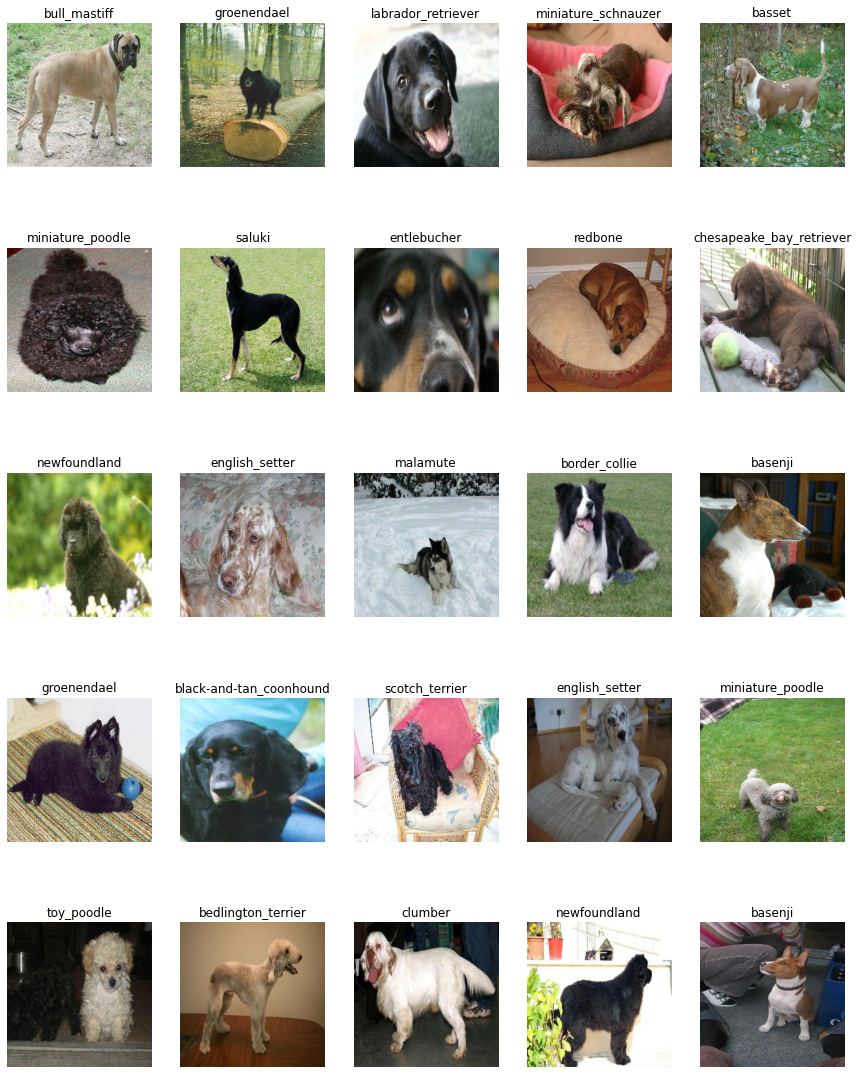

In [ ]:
show_image(trainim,labelim)

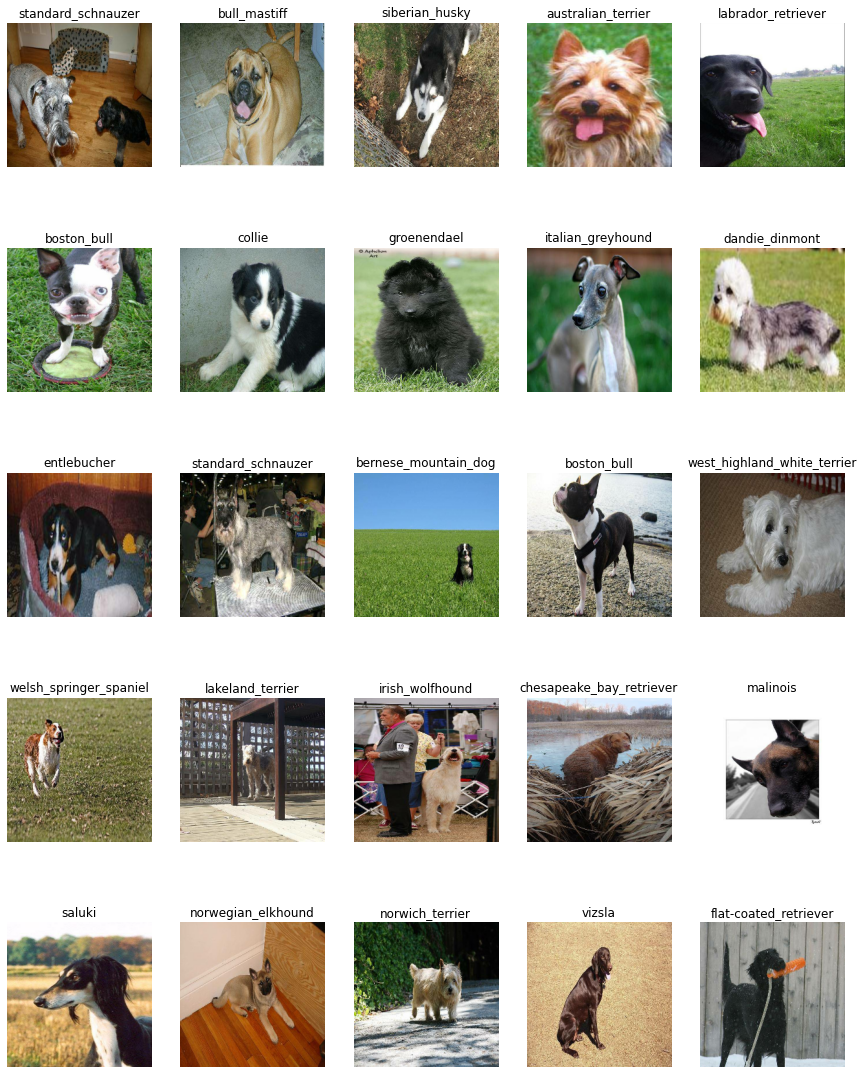

In [ ]:
validim,validlabel=next(validing_data.as_numpy_iterator())#does'nt shuffle so always same answer
show_image(validim,validlabel)

# Building a Model
## Before building a model there are things that we need to define

  * defining our input(Our image shape in the form of tensors) in our model
  * define output shape(image labels in the form of tensors) in our model
  * the URL of the model we want to use

In [ ]:
# seting up INPUT shape of the model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

# setting up the OUTPUT shape of the model
OUTPUT_SHAPE=len(unique_breeds)

# setting up URL of model from tensorflowhub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

# Now we've got out input,outputs and model ready to go.Let's put them together into a Kera deep Learning Model Knowing this, let's create a function which:
  * Takes the input shape,output shape and the model we've chosen as parameters.
  * Define the layers in keras in sequential fashion(do this first then do that)
  * Compiles the Model (says it should be evaluated and improved).
  * Builds the model (tells the model the input shape it'll be getting).
  * Returns the model

## All this can be found in the Keras overview section of tensor flow docs

In [ ]:
from tensorflow._api.v2.config import optimizer
# creating a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:",model_url)

  #setup the model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(model_url), # the layers defined in the model url
      tf.keras.layers.Dense(units=output_shape,activation="softmax") # addition layer in CNN added to match our output
  ])

  # compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # build the model
  model.build(input_shape)

  return model

In [ ]:
 model = create_model()
 model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating Callbacks

callbacks are helper functions that helper functions a model can use during training to do such things as save its progress,check its progress or stop training early if a model stops improving.

we'll create two callbacks,one for TensorBoard which which helps track our models progress and another for early stopping which prevents our model from training for too long

## TensorBoard Callback

To setup a TensorBoard callback,we need to do 3 things:
1. Load the TensorBoard Notebook extension.
2. create a TensorBoard callback which is able to save logs to a directory and pass it to  our model's `fit()` function.
3. Visualize our model training logs with the `%tensorboard` magic function (we'll do this after model tyraining).

In [ ]:
#loading tensorboard(api extension of tensorflow) notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# a function to build a TensorBoard Callback
def create_tensorboard_callback():
  # log directory
  logdir=os.path.join("/content/drive/MyDrive/Neural Networks/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir)

### Early stopping callback

Early stopping helps our model from overfitting by stopping training if a certain evaluating metric stops improving. think of it likeee you not learning your course material anymore more like memorizing the course material as a result you can't answer anything that you have not memorized that is you cannot predict on different dataset.

- can look about it in tensorflow docs

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

In [ ]:
# defining the NUM_EPOCHS
NUM_EPOCHS=100

def train_model():
  """
    Training the model and returning the trained model
  """

  model=create_model()

  tensorboard=create_tensorboard_callback()

  model.fit(x=training_data,epochs=NUM_EPOCHS,validation_data=validing_data,validation_freq=1,callbacks=[tensorboard,early_stopping])

  return model

In [ ]:
# training a modal
modal=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 220s 8s/step - loss: 4.4375 - accuracy: 0.1125 - val_loss: 3.3340 - val_accuracy: 0.2650
Epoch 2/100
25/25 [==============================] - 3s 119ms/step - loss: 1.5508 - accuracy: 0.7050 - val_loss: 2.1345 - val_accuracy: 0.5250
Epoch 3/100
25/25 [==============================] - 3s 118ms/step - loss: 0.5315 - accuracy: 0.9425 - val_loss: 1.7313 - val_accuracy: 0.5650
Epoch 4/100
25/25 [==============================] - 4s 171ms/step - loss: 0.2368 - accuracy: 0.9900 - val_loss: 1.5297 - val_accuracy: 0.6200
Epoch 5/100
25/25 [==============================] - 3s 128ms/step - loss: 0.1363 - accuracy: 0.9987 - val_loss: 1.4620 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 3s 115ms/step - loss: 0.0943 - accuracy: 1.0000 - val_loss: 1.4127 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================]

## Overfitting at the begining is good as it is leaerning something

In [ ]:
#Tensor Board

!tensorboard dev upload \
  --logdir "/content/drive/MyDrive/Neural Networks/logs" \
  --name "(My latest Experiment)" \
  --description "Simple comparision of several hyperparameters" \
  --one_shot

2023-02-18 06:27:14.655330: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-18 06:27:14.655446: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-18 06:27:14.655469: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/drive/MyDrive/Neural Netw

In [ ]:
predictions=model.predict(validing_data,verbose=1)

7/7 [==============================] - 15s 90ms/step


In [ ]:
predictions.shape

(200, 120)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
index=115
print(predictions[index]) # predictions of 'index'
print(f"Max value (probability of predictions):{np.max(predictions[index])}")
print(f"Sum : {np.sum(predictions[index])}")
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Prediction label: {unique_breeds[np.argmax(predictions[index])]} ")

[1.30367451e-04 8.31754121e-04 2.36248947e-03 2.61450163e-03
 3.63396294e-03 1.67108104e-02 8.46301089e-04 3.28933937e-03
 1.43576914e-03 1.79577023e-02 5.42957161e-04 8.73905327e-03
 2.64779519e-04 2.32717721e-03 1.90711729e-02 2.57757347e-04
 1.13398256e-02 9.34638520e-05 5.70779759e-03 3.20547796e-03
 7.21312012e-04 3.31218890e-03 8.02897150e-04 4.70782211e-03
 3.46002314e-04 5.97877137e-04 2.65734212e-04 8.04131944e-03
 3.32925585e-04 7.24887289e-03 4.01864573e-03 8.36826337e-04
 3.26733221e-03 1.56137021e-02 1.22866116e-03 3.77411395e-02
 5.57242427e-04 2.36594467e-03 3.83552921e-04 4.78626080e-02
 6.10857969e-03 4.02907515e-03 1.42676639e-03 2.41689640e-03
 1.26314769e-03 2.15695444e-02 2.68952601e-04 1.77492853e-02
 4.99200774e-03 6.45986646e-02 5.31325070e-03 3.05454782e-03
 1.30913341e-02 1.20202440e-03 1.94339955e-03 1.94009219e-03
 1.21638957e-04 1.73832923e-02 3.58851044e-04 1.33798793e-02
 6.96734118e-04 3.52199795e-03 1.66544327e-04 2.11000690e-04
 7.05402199e-05 5.478651

## Convert the predictions arrya into a label

In [ ]:
def get_pred_label(predictions_prob):
  """
    Turns an array of probability to label
  """
  return unique_breeds[np.argmax(predictions_prob)]

In [ ]:
print(get_pred_label(predictions[18]))

NameError: ignored

In [ ]:
def unbatchify(data):
  """
    Takes a tensor of (image,label) and return a separate arrays of image(array) and label(false for all others and true for the one that is true)
  """
  images_=[]
  labels_=[]

  for image,label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])

  return images_,labels_

In [ ]:
validating_images,validating_labels=unbatchify(validing_data)
validating_images[0],validating_labels[0]

In [ ]:
# this function takes our prediction and the images and labels on which it has predited and tells us visually if correct or not

def plot_pred(predictions_probabilities,images,labels,n=1):
  """
    View the Predictions and ground truth
  """

  pred_prob,true_label,image=predictions_probabilities[n],labels[n],images[n]

  pred_label=get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  color="Grey"
  if(true_label==pred_label):
    color="Green"
  else:
    color="Red"

  plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)



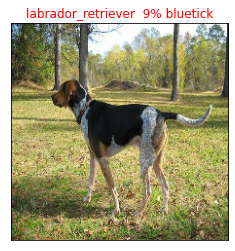

In [ ]:
plot_pred(predictions,validating_images,validating_labels,45)

In [ ]:
def plot_pred_conf(predictions_probabilities,labels,n=1):
  """
      Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """

  pred_prob,true_label=predictions_probabilities[n],labels[n]

  pred_label=get_pred_label(pred_prob)

    # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

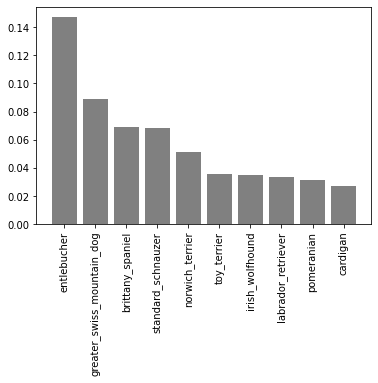

In [ ]:
plot_pred_conf(predictions,validating_labels,24)

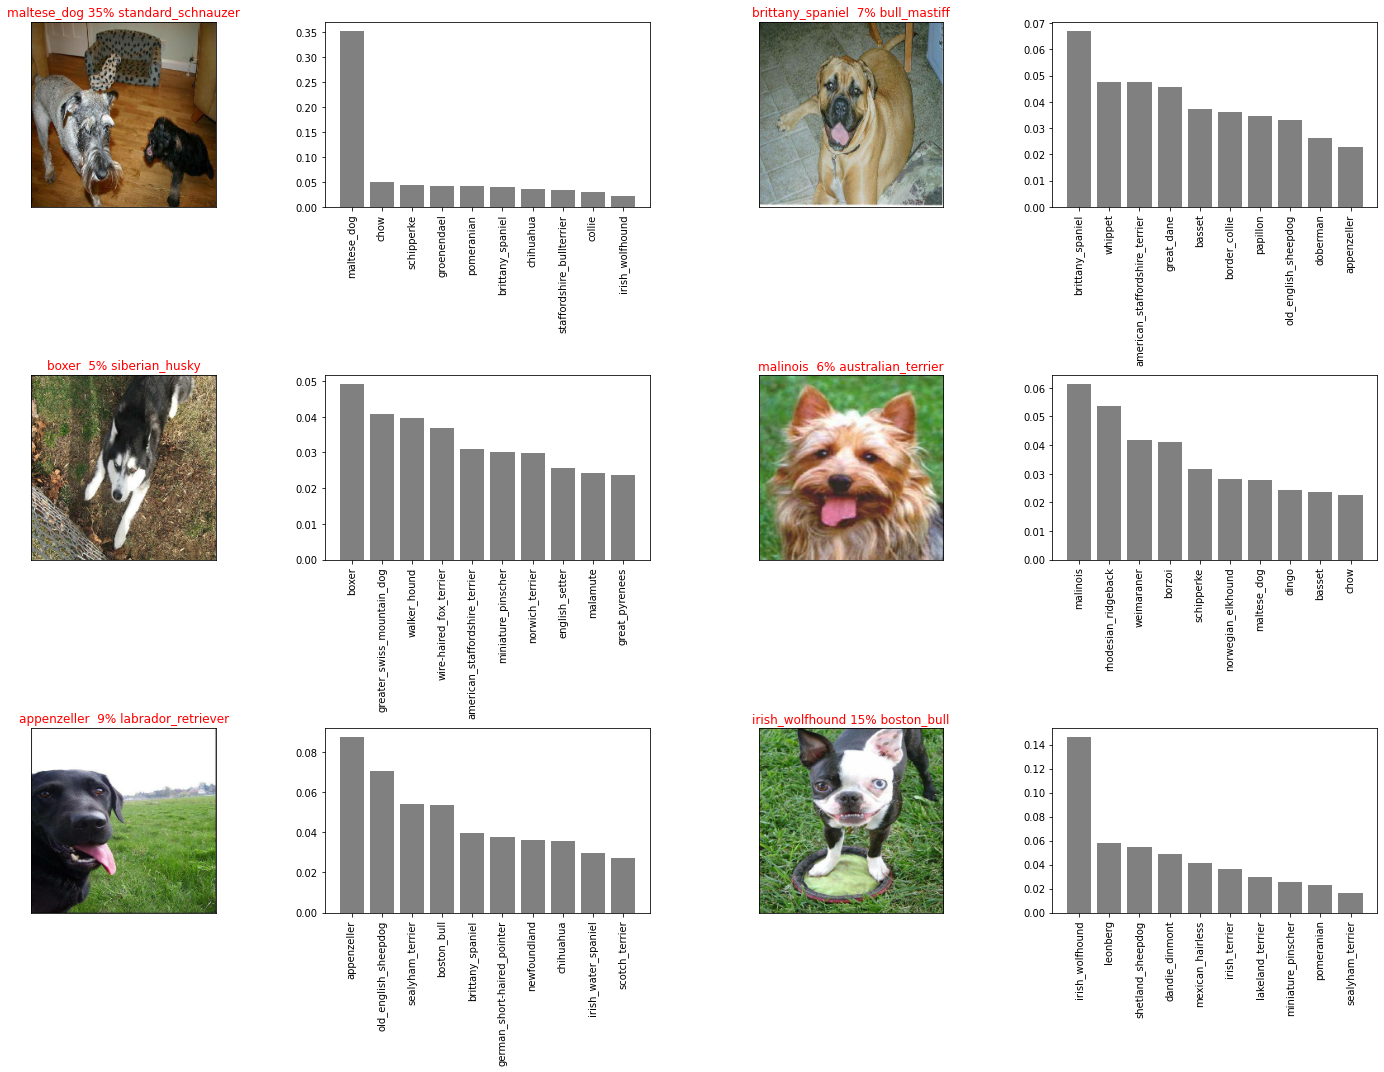

In [ ]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions,validating_images,validating_labels,i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(predictions,validating_labels,i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
def save_model(model,suffix=None):
  """
    fUNCTION TO SAVE THE MODEL STATE SO THAT YOU CAN USE IT LATER ON
  """

  modeldir=os.path.join("/content/drive/MyDrive/Neural Networks/models",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path=modeldir+"-"+suffix+".h5"

  model.save(model_path)
  print(f"model is saved at location {model_path}")
  return model_path

In [ ]:
def load_model(model_path):
  """
    Load a model that is stored in the given location
  """

  print(f"Loading saved model from : {model_path}")
  model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
save_model(model,"1000-images-mobilenetv2-Adam")

model is saved at location /content/drive/MyDrive/Neural Networks/models/20230218-183249-1000-images-mobilenetv2-Adam.h5


'/content/drive/MyDrive/Neural Networks/models/20230218-183249-1000-images-mobilenetv2-Adam.h5'

In [ ]:
image_1000_model=load_model("/content/drive/MyDrive/Neural Networks/models/20230218-072143-1000-images-mobilenetv2-Adam.h5")

Loading saved model from : /content/drive/MyDrive/Neural Networks/models/20230218-072143-1000-images-mobilenetv2-Adam.h5


In [ ]:
model.evaluate(validing_data)

7/7 [==============================] - 2s 81ms/step - loss: 5.8209 - accuracy: 0.0050


[5.820898532867432, 0.004999999888241291]

In [ ]:
image_1000_model.evaluate(validing_data)

7/7 [==============================] - 1s 87ms/step - loss: 5.8209 - accuracy: 0.0050


[5.820898532867432, 0.004999999888241291]

# Training a BigDog model on the Full dataset

In [ ]:
len(x),len(y)

(10222, 10222)

In [ ]:
full_data=create_data_batch(x,y)

Creating Training Data


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# create a model for full model
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# tensorboard and earlystop
full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [ ]:
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_early_stopping,full_model_tensorboard])

Epoch 1/100
320/320 [==============================] - 1253s 4s/step - loss: 1.3335 - accuracy: 0.6709
Epoch 2/100
320/320 [==============================] - 399s 1s/step - loss: 0.3998 - accuracy: 0.8812
Epoch 3/100
320/320 [==============================] - 414s 1s/step - loss: 0.2328 - accuracy: 0.9376
Epoch 4/100
320/320 [==============================] - 398s 1s/step - loss: 0.1525 - accuracy: 0.9659
Epoch 5/100
320/320 [==============================] - 403s 1s/step - loss: 0.1050 - accuracy: 0.9782
Epoch 6/100
320/320 [==============================] - 399s 1s/step - loss: 0.0775 - accuracy: 0.9860
Epoch 7/100
320/320 [==============================] - 406s 1s/step - loss: 0.0583 - accuracy: 0.9907
Epoch 8/100
320/320 [==============================] - 409s 1s/step - loss: 0.0461 - accuracy: 0.9949
Epoch 9/100
320/320 [==============================] - 405s 1s/step - loss: 0.0367 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 402s 1s/step - loss: 0.03

In [ ]:
save_model(full_model,"Full_data-mobilenetv2-Adam")

model is saved at location /content/drive/MyDrive/Neural Networks/models/20230218-121132-Full_data-mobilenetv2-Adam.h5


'/content/drive/MyDrive/Neural Networks/models/20230218-121132-Full_data-mobilenetv2-Adam.h5'

In [ ]:
full_loaded_model=load_model("/content/drive/MyDrive/Neural Networks/models/20230218-121132-Full_data-mobilenetv2-Adam.h5")

Loading saved model from : /content/drive/MyDrive/Neural Networks/models/20230218-121132-Full_data-mobilenetv2-Adam.h5


# We will do the Testing with Test data:
  * get test files
  * create the test dataset to batchs of tensor so that they can be tested
  * make the predictions using predict()

In [ ]:
test_path="/content/drive/MyDrive/Neural Networks/test"
test_files=[test_path+"/"+file for file in os.listdir(test_path)]

In [ ]:
test_files[:5]

['/content/drive/MyDrive/Neural Networks/test/e2faaf5e760a6189d0980e6355864b4c.jpg',
 '/content/drive/MyDrive/Neural Networks/test/e70dfb4bf50f74850463cfd35edc8af5.jpg',
 '/content/drive/MyDrive/Neural Networks/test/e1dd78810048dc387573f2ec50e4bb16.jpg',
 '/content/drive/MyDrive/Neural Networks/test/df69bb4b3dbdc81541e2bd70a5f35cb1.jpg',
 '/content/drive/MyDrive/Neural Networks/test/e0e3eb01e80b1d694a47b23909e158ec.jpg']

In [ ]:
# create test batch
test_data=create_data_batch(test_files,test=True)

Creating test dataset Batch...


In [ ]:
len(test_files)

10357

In [ ]:
test_predictions=full_loaded_model.predict(test_data,verbose=1)

324/324 [==============================] - 194s 547ms/step


In [ ]:
np.savetxt("/content/drive/MyDrive/Neural Networks/test_predictions/pred.csv",test_predictions,delimiter=",")

In [ ]:
test_predictions[:10]

array([[8.8647312e-09, 3.4138814e-06, 4.4511165e-07, ..., 8.3206388e-08,
        1.8652532e-06, 2.6086720e-06],
       [2.9751895e-12, 6.0228094e-12, 1.9613917e-10, ..., 4.7475274e-11,
        1.8540506e-09, 2.2068614e-12],
       [3.8068640e-06, 3.3881459e-08, 7.9541600e-09, ..., 2.0246677e-08,
        1.6584471e-06, 2.9009275e-06],
       ...,
       [1.3493651e-07, 6.2506684e-09, 2.2058986e-09, ..., 2.6791691e-10,
        2.8070881e-09, 1.4706512e-05],
       [3.6631909e-10, 3.6657942e-12, 2.6456051e-12, ..., 1.8497038e-09,
        9.3184663e-06, 1.9544584e-10],
       [8.1861107e-10, 1.4670394e-10, 9.3256878e-12, ..., 2.6451927e-12,
        1.0821052e-09, 5.0111328e-08]], dtype=float32)

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

# Preparing fot submition in Kaggle:
  * create a pandas daa frame wih id and all the the breeds in the datase
  * extract the id from test dataset
  * extract probability of each breed
  * exit it as a .csv file to be submitted to Kaggle

In [ ]:
test_path = "/content/drive/MyDrive/Neural Networks/test"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  e2faaf5e760a6189d0980e6355864b4c           NaN          NaN   
1  e70dfb4bf50f74850463cfd35edc8af5           NaN          NaN   
2  e1dd78810048dc387573f2ec50e4bb16           NaN          NaN   
3  df69bb4b3dbdc81541e2bd70a5f35cb1           NaN          NaN   
4  e0e3eb01e80b1d694a47b23909e158ec           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e2faaf5e760a6189d0980e6355864b4c   8.864731e-09  3.413881e-06   
1  e70dfb4bf50f74850463cfd35edc8af5   2.975190e-12  6.022809e-12   
2  e1dd78810048dc387573f2ec50e4bb16   3.806864e-06  3.388146e-08   
3  df69bb4b3dbdc81541e2bd70a5f35cb1   2.532343e-10  2.162625e-11   
4  e0e3eb01e80b1d694a47b23909e158ec   1.269968e-08  1.077476e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.451117e-07  4.663155e-07                    3.954480e-08   
1         1.961392e-10  1.845119e-12                    2.713782e-12   
2         7.954160e-09  3.423159e-11                    7.497310e-09   
3         1.277888e-09  2.264400e-09                    1.006787e-06   
4         6.925901e-10  3.148177e-10                    1.283854e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.268293e-09        8.104493e-08  6.259508e-10  3.601116e-09  ...   
1  4.162001e-11        1.161405e-11  1.195400e-06  1.330705e-06  ...   
2  4.785097e-10        8.949778e-08  2.364548e-09  3.843370e-07  ...   
3  5.694804e-05        1.635220e-08  1.120263e-06  1.766123e-08  ...   
4  1.220431e-08        4.496451e-09  3.097043e-09  1.469615e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.770623e-11  6.202394e-09  3.335062e-07  7.442072e-03  5.108396e-07   
1  5.645652e-11  1.849186e-10  8.489011e-14  4.959719e-13  8.552108e-16   
2  3.366313e-04  3.563783e-07  1.136928e-07  1.399534e-08  4.677528e-08   
3  1.678932e-08  1.012408e-10  3.104532e-10  1.238784e-08  2.549311e-09   
4  1.562199e-06  8.987450e-10  7.213686e-11  2.011713e-08  1.563846e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            1.762775e-07                 1.485501e-04  8.320639e-08   
1            2.077617e-11                 4.319685e-13  4.747527e-11   
2            1.801577e-12                 2.216070e-07  2.024668e-08   
3            6.406534e-09                 2.145060e-10  3.223990e-09   
4            2.563681e-10                 3.273549e-10  7.878322e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.865253e-06       2.608672e-06  
1             1.854051e-09       2.206861e-12  
2             1.658447e-06       2.900927e-06  
3             1.729561e-10       1.112934e-10  
4             1.284964e-09       1.960024e-09  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv("/content/drive/MyDrive/Neural Networks/full_submission_1_mobilienetV2_adam.csv",
                 index=False)

# Now how to work on custom images

In [ ]:
custom_path="/content/drive/MyDrive/Neural Networks/My-dog-photo/"
path=[custom_path+fname for fname in os.listdir(custom_path)]

In [ ]:
path

['/content/drive/MyDrive/Neural Networks/My-dog-photo/download.jpeg']

In [ ]:
custom_data=create_data_batch(path,test=True)
custom_data

Creating test dataset Batch...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
custom_preds=full_loaded_model.predict(custom_data)
custom_preds

1/1 [==============================] - 1s 986ms/step


array([[5.27803365e-07, 5.92190463e-11, 5.29357912e-11, 7.42791731e-11,
        8.41080261e-11, 5.37326824e-12, 1.21957669e-07, 1.47782719e-09,
        2.09454267e-13, 5.97196945e-12, 6.95556148e-14, 4.39709658e-10,
        3.66933872e-10, 8.04986633e-11, 6.13877642e-14, 1.58317578e-11,
        3.00532710e-10, 3.37743679e-12, 4.90795217e-11, 1.72252559e-10,
        1.98019400e-12, 4.49416449e-10, 1.44540223e-07, 4.30150165e-10,
        4.09528184e-12, 1.43941900e-10, 1.15091915e-10, 1.43223411e-12,
        7.54388481e-14, 9.48061643e-06, 8.31826554e-08, 1.13110324e-12,
        1.99610398e-10, 8.61648246e-08, 1.40210794e-11, 1.17828152e-11,
        2.16873061e-10, 7.01173603e-13, 1.57465915e-11, 2.03174322e-09,
        1.83152087e-11, 3.73720396e-13, 1.18345516e-11, 2.69272213e-12,
        4.17984369e-10, 2.02603996e-08, 1.35724765e-10, 2.34378294e-12,
        1.52887789e-11, 6.69951455e-11, 1.07127585e-10, 6.72413236e-11,
        2.04232846e-11, 6.57663811e-12, 2.38517401e-08, 2.755327

In [ ]:
# get custom Image
custom_preds_label=[get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_preds_label

['pomeranian']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

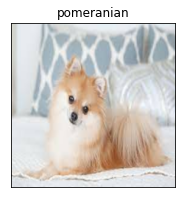

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_preds_label[i])
  plt.imshow(image)